In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../results/complete.csv')
df['crc'] = df['crc'].str.upper()

In [22]:
df = df.drop(columns='runs')

# Raw Average Results

In [23]:
means = df.groupby(['test','crc','program']).mean()
means

bundles/second
test     crc    program                               
Creating CRC_16 bp7-go-v0.1.native.out         18016.5
                bp7-go-v0.2.native.out         17699.0
                bp7-go-v0.2.wasm.out            2326.5
                bp7-rs.native.out              86670.5
                bp7-rs.wasm.out                75535.5
         CRC_32 bp7-go-v0.1.native.out         17107.5
                bp7-go-v0.2.native.out         16987.0
                bp7-go-v0.2.wasm.out            2331.5
                bp7-rs.native.out              86954.5
                bp7-rs.wasm.out                76816.5
         CRC_NO bp7-go-v0.1.native.out         17921.0
                bp7-go-v0.2.native.out         18762.5
                bp7-go-v0.2.wasm.out            2441.0
                bp7-rs.native.out              99947.5
                bp7-rs.wasm.out                83528.5
Encoding CRC_16 bp7-go-v0.1.native.out         53797.0
                bp7-go-v0.2.native.out        235499.0
                bp7-go-v0.2.wasm.out           13626.5
                bp7-rs.native.out             532732.5
                bp7-rs.wasm.out               709821.0
         CRC_32 bp7-go-v0.1.native.out         54607.5
                bp7-go-v0.2.native.out        269905.5
                bp7-go-v0.2.wasm.out           14679.5
                bp7-rs.native.out             527745.5
                bp7-rs.wasm.out               684612.5
         CRC_NO bp7-go-v0.1.native.out         55803.5
                bp7-go-v0.2.native.out        503244.5
                bp7-go-v0.2.wasm.out           27302.0
                bp7-rs.native.out            1520157.0
                bp7-rs.wasm.out              2239046.0
Loading  CRC_16 bp7-go-v0.1.native.out         45950.0
                bp7-go-v0.2.native.out         45249.0
                bp7-go-v0.2.wasm.out            9266.0
                bp7-rs.native.out             523655.0
                bp7-rs.wasm.out               375689.5
         CRC_32 bp7-go-v0.1.native.out         44417.0
                bp7-go-v0.2.native.out         46119.5
                bp7-go-v0.2.wasm.out            9048.0
                bp7-rs.native.out             511739.0
                bp7-rs.wasm.out               371727.5
         CRC_NO bp7-go-v0.1.native.out         97386.5
                bp7-go-v0.2.native.out         52297.0
                bp7-go-v0.2.wasm.out           11864.0
                bp7-rs.native.out             616902.5
                bp7-rs.wasm.out               402988.0

In [24]:
def get_stats(test_name, crc_type):
    res = df[df['test'] == test_name]
    res_means = res.groupby(['program','crc'], as_index=False).mean()
    res_means.sort_values(by=['crc'])
    return res_means[res_means.crc == crc_type].set_index(['program', 'crc'])

In [25]:
creating_no = get_stats('Creating','CRC_NO')

In [26]:
creating_16 = get_stats('Creating','CRC_16')

In [27]:
creating_32 = get_stats('Creating','CRC_32')

# Bundle Creation

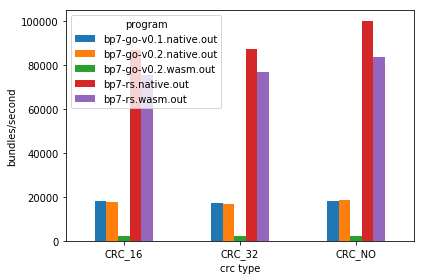

In [28]:
df2 = df[df['test'] == 'Creating']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("creating.png")

# Bundle Encoding

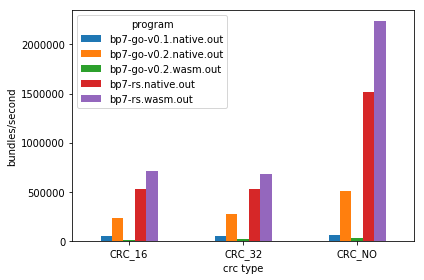

In [29]:
df2 = df[df['test'] == 'Encoding']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("encoding.png")

# Bundle Decoding

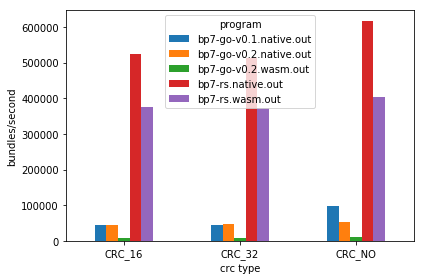

In [30]:
df2 = df[df['test'] == 'Loading']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("loading.png")

# Binary Sizes

In [84]:
bin_map = {"/src/bp7wasm/target/release/bp7eval" : "bp7-rs.native", 
           "/src/bp7wasm/target/deploy/bp7eval.wasm" : "bp7-rs.wasm",
           "/src/dtn7-go-v0.1/tests/tests" : "bp7-go-v0.1.native",
           "/src/dtn7-go-v0.1/tests/wasm/test.wasm" : "bp7-go-v0.1.wasm",
           "/src/dtn7-go-v0.2/tests/tests" : "bp7-go-v0.2.native",
           "/src/dtn7-go-v0.2/tests/wasm/test.wasm" : "bp7-go-v0.2.wasm",
          }
df = pd.read_csv('../results/binary.sizes.txt', sep=' ', header=None, names=["size", "binary"])
df = df.replace(bin_map)
df

,size,binary
0,522584,bp7-rs.native
1,418304,bp7-rs.wasm
2,10490256,bp7-go-v0.1.native
3,17654129,bp7-go-v0.1.wasm
4,1945448,bp7-go-v0.2.native
5,3406923,bp7-go-v0.2.wasm


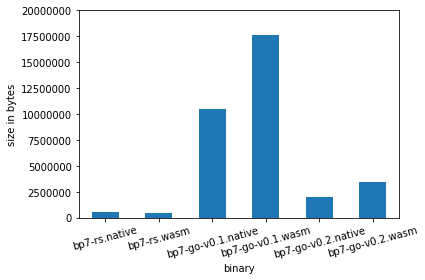

In [85]:
ax = df.plot(kind='bar', rot=15, x='binary', y='size', legend=False, ylim=(0,20000000))
ax.set_ylabel('size in bytes')
ax.ticklabel_format(axis = 'y', style = 'plain')
plt.tight_layout()
plt.savefig("binarysizes.png")